# This is Titanic Dataset in which we are predicting the survival of the passenger using Logistic Regression


# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# 2) Loading of dataset into Pandas DataFrame

In [2]:
titanic_train = pd.read_csv('train.csv', index_col='Name')
titanic_train
train_df = pd.DataFrame(titanic_train)
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Palsson, Master. Gosta Leonard",8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.0,0,2,347742,11.1333,NaN,S


# 3) Preprocessing of Training data

In [3]:
des = train_df.isnull()
des.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891
unique,1,1,1,1,2,1,1,1,1,2,2
top,False,False,False,False,False,False,False,False,False,True,False
freq,891,891,891,891,714,891,891,891,891,687,889


In [4]:
# To drop NaN value from a particular place using imputation
age = train_df["Age"]
train_df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.00,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.00,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.45,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.00,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Calculating mean of the age
age_mean = age.mean()
age_mean

29.69911764705882

In [6]:
#With the mean, let's fill the nulls using fillna():
age_mean = int(age_mean)
age.fillna(age_mean, inplace=True)
age.describe()

count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

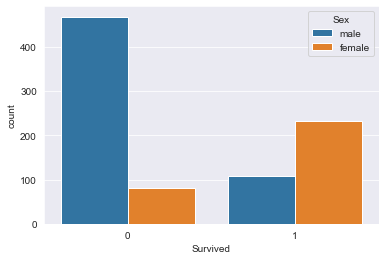

In [7]:
sns.set_style('darkgrid')
sns.countplot('Survived', hue='Sex', data=train_df)


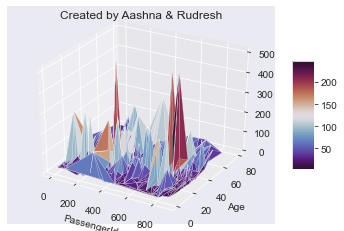

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(train_df['PassengerId'], train_df['Age'], train_df['Fare'], cmap=plt.cm.twilight_shifted, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.title('Created by Aashna & Rudresh')
plt.xlabel('PassengerId')
plt.ylabel('Age')

plt.show()


In [9]:
train_df.drop(['Cabin', 'Embarked', 'SibSp', 'Ticket', 'Sex'], axis = 1, inplace=True)
train_df.describe()

,PassengerId,Survived,Pclass,Age,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.005010,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,6.000000,512.329200


In [10]:
train_df.isnull()
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
Parch          0
Fare           0
dtype: int64

# 4)  Spliting of Data in Train & Test

In [11]:
x = train_df.drop('Survived', axis= 1)
y = train_df['Survived'].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=32)

# 5) Training and Predicting

In [13]:
from sklearn.linear_model import LogisticRegression
lo_reg = LogisticRegression()
lo_reg.fit(X_train,y_train)

LogisticRegression()

In [14]:
pred = lo_reg.predict(X_test)
pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

Text(0.5, 16.0, 'Predicted label')

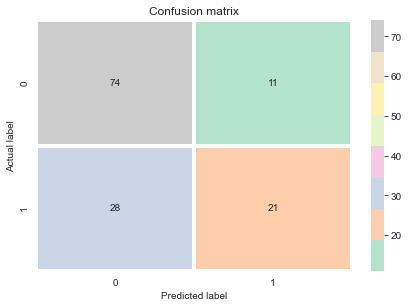

In [15]:
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, pred)
#cnf_matrix
sns.heatmap(cnf_matrix, annot=True, cmap="Pastel2" ,fmt='g', linewidth = 3)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.7089552238805971
Precision: 0.65625
Recall: 0.42857142857142855
